<a href="https://colab.research.google.com/github/100485446-UC3M/Primera_Practica_Machine_Learning_Grupo16/blob/main/Predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicciones Práctica 1
## Esteban Gómez Buitrago 100485446
## Nicolás Alejandro Cuesta García 100495966
## Grupo 16

## Análisis Exploratorio de Datos

PAra realizar este projecto utilizamos los set de datos "attrition_availabledata_10.csv" y"attrition_competition_10.csv". Decidimos utilizar estos, después de realizar la suma de los últimos dos digitos del NIA 100485446 (4 + 6 = 10).

Al analizar los datos, la primera conclusión a la que se puede llegar es que este es un problema de clasificación. Se está realizando un estudio en el cual a través de algunas variables se va a definir si la clase (en este caso, el attributo "Attrition") es "Yes" o "No".

Para encontrar ciertos datos importantes para continuar con el análisis, será necesario utilizar ciertas funciones de python. El código y los resultados están descritos a continuación:

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
#Las librerías necesarias son importadas
import pandas as pd

In [ ]:
#Se lee el fichero de datos
data = pd.read_csv('attrition_availabledata_10.csv.gz')

#Para chequear que sea el set de datos correcto
#print(data.head())

print(f"Número de variables (columnas): {data.shape[1] - 1}")
print(f"Número de instancias (filas): {data.shape[0]}")
valoresvacios = data.isnull().sum()
print("Valores vacíos por columna:\n", valoresvacios.to_dict())
print(f"Número total de valores vacíos: {data.isnull().sum().sum()}")

#Las columnas de tipo object son las categóricas
categorical_cols = data.select_dtypes(include=['object'])
unique_counts = categorical_cols.nunique()
print("\nNúmero de categorías por variable categórica:\n", unique_counts.to_dict())
constant_columns = data.columns[data.nunique() == 1].tolist()
print("\nColumnas constantes:\n", constant_columns)
id_cols = data.columns[data.nunique() == data.shape[0]]
print("Columnas de ID:\n", id_cols)

num_yes = data["Attrition"].eq("Yes").sum()
num_no = data["Attrition"].eq("No").sum()
Total_attrition = num_no + num_yes
if Total_attrition == data.shape[0]:
  print(f"\nNúmero de empleados que dejaron la empresa (Attrition = Yes): {num_yes}")
  print(f"Número de empleados que no dejaron la empresa (Attrition = No): {num_no}")
else:
  print("Error en el número de instancias, hay valores no reconocidos")


Número de variables (columnas): 30
Número de instancias (filas): 2940
Valores vacíos por columna:
 {'hrs': 0, 'absences': 0, 'JobInvolvement': 0, 'PerformanceRating': 0, 'EnvironmentSatisfaction': 15, 'JobSatisfaction': 12, 'WorkLifeBalance': 29, 'Age': 0, 'BusinessTravel': 0, 'Department': 0, 'DistanceFromHome': 0, 'Education': 0, 'EducationField': 0, 'EmployeeCount': 0, 'EmployeeID': 0, 'Gender': 0, 'JobLevel': 0, 'JobRole': 0, 'MaritalStatus': 0, 'MonthlyIncome': 0, 'NumCompaniesWorked': 17, 'Over18': 0, 'PercentSalaryHike': 0, 'StandardHours': 0, 'StockOptionLevel': 0, 'TotalWorkingYears': 5, 'TrainingTimesLastYear': 0, 'YearsAtCompany': 0, 'YearsSinceLastPromotion': 0, 'YearsWithCurrManager': 0, 'Attrition': 0}
Número total de valores vacíos: 78

Número de categorías por variable categórica:
 {'BusinessTravel': 3, 'Department': 3, 'EducationField': 6, 'Gender': 2, 'JobRole': 9, 'MaritalStatus': 3, 'Over18': 1, 'Attrition': 2}

Columnas constantes:
 ['EmployeeCount', 'Over18', 'Sta

El estudio será realizado con 30 variables y 2940 instancias distintas. Es importante resaltar que al número de variables se le resto la variable "Attrition" ya que esta es nuestra variable de calisifcación (objetivo). Después de analizar las variable individualmente encontramos que tenemos variables catégoricas, ordinales y númericas.

Las variabes **catégoricas** son (7):   

*   BusinessTravel
*   Department
*   EducationField
*   Gender
*   JobRole
*   MaritalStatus
*   Over18

Las **númericas** incluyen (15):  

*   hrs
*   absences
*   Age
*   DistanceFromHome
*   MonthlyIncome
*   PercentSalaryHike
*   TotalWorkingYears
*   TrainingTimesLastYear
*   NumCompaniesWorked
*   EmployeeCount
*   EmployeeID
*   StandardHours
*   YearsAtCompany
*   YearsSinceLastPromotion
*   YearsWithCurrManager

Finalmente, entre las **ordinales** están (8):

*   JobInvolvement
*   JobLevel
*   Education
*   PerformanceRating
*   EnvironmentalSatisfaction
*   JobSatisfaction
*   WorkLifeBalance
*   StockOptionLevel

Para definir si una variable es de **alta cardinalidad** o no vamos a tomar el límite de **5 categorías**. Tomando este límite podemos ver que **existen 2 variables que tendrían alta cardinalidad**: EducationField (6) y JobRole (9). El resto de variables categóricas tienen 3 o menos categorías cada una, por lo que no tienen una cardinalidad alta.

Asimismo, es pertinente analizar si tenemos variables que tengan el mismo valor en todas las instancia (**columnas constantes**).  Como se puede evidenciar en el código anterior, exite una variable "Over18", que siempre tiene el mismo valor ("Y"). De esta forma se puede concluir que **'Over18', 'EmployeeCount' y 'StandardHours' son una columnas constantes** y no le va a proporciona información útil al modelo, se deberá tratar con ella en el preproceso.

Hay que buscar **columnas de ID** que son columnas que tienen un valor diferente para cada instancia, y pueden servir como identificadores. Con el código encontramos que tenemos una columna que cumple con esta descripción. La variable **"EmployeeID" es una columna de ID**.

Entre todas estas instancias tenemos **78 valores vacíos** dividos en 5 variables: WorkLifeBalance (29),  NumCompaniesWorked: (17), EnvironmentSatisfaction (15), Job Satisfaction (12), y TotalWorkingYears (5). Esto es un factor a tener en cuenta a la hora de realizar el preproceso.

Cómo ya se describió antes, este es un problema de **clasificación**, para  finalizar, es pertinente analizar si está balanceado. La variable "*Attrition*" es nuestro clasificador, esta puede tener el valor de "Yes" o  "No". Para saber si está balanceado se debe ver cuantas intancias existen con cada valor. Como se puede ver en el código expuesto previamente, en este caso exiten 474 instancias que tienen en esta variable el valor de  "Yes" y 2466 que tienen "No". Con esto se puede concluir que el problema **NO está balanceado**, y se tendrá que utilizar una técnica de balanceo durante el preproceso.


## Preproceso Sin Leakage
Durante esta fase se llevarán a cabo 5 tares principales. La primera tarea es remover las columnas constantes o/y ID ya que estas no van a proveer de información útil al modelo. Posteriormente se tratarán los valores vacíos del set de datos.

### Eliminación de Columnas Constantes y de ID.
El primer paso que hay que llevar a cabo es eliminar las columnas constantes y de ID, ya que no van a aportar información al modelo. Esto se puede realizar al momento, ya que no hay peligro de "Data/Information Leakage"

In [ ]:
import numpy as np
import sklearn as sk
#Se crea una semilla para poder replicar los resultado y se leen los datos
np.random.seed(100495966)

#Primero removemos las columnas constantes y de ID.
x = data.drop(columns=["Over18", "EmployeeID", "EmployeeCount", "StandardHours", "Attrition"])
y = data["Attrition"]
y =y.map({'Yes': 1, 'No': 0})

### Codificación de Variables Categóricas
Ahora vamos a codificar las variables c:ategóricas, para esto utilizaremos el método de One-Hot-Encoding.

In [ ]:
onehot_columns = ['BusinessTravel', 'Gender','Department', 'EducationField', 'JobRole', 'MaritalStatus']
x = pd.get_dummies(x, columns=onehot_columns, drop_first=True)
x = x.astype({col: "Int64" for col in x.select_dtypes(include=["bool"]).columns})

print(x.head())
print(f"Numero de columnas: {x.shape[1]}")


        hrs  absences  JobInvolvement  PerformanceRating  \
0  7.462297        13               3                  3   
1  7.488597         6               1                  3   
2  7.116541        16               2                  4   
3  9.709125         6               3                  4   
4  6.297729         6               4                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age  \
0                      3.0              3.0              3.0   48   
1                      3.0              4.0              4.0   31   
2                      1.0              1.0              3.0   36   
3                      3.0              3.0              3.0   49   
4                      3.0              2.0              3.0   40   

   DistanceFromHome  Education  ...  JobRole_Human Resources  \
0                12          4  ...                        0   
1                 2          2  ...                        0   
2                14          3  

## Preproceso con Leakage

### Evaluación Interna
Vamos a realizar una evaluación interna para determinar cualés son los tipos de normalización y imputación que dan mejor resultado. En esta étapa del proceso de preprocesado hay peligro de fuga de datos (data leakage), por este motivo separaremos los datos en un grupo de entrenamiento y uno de testeo, para evitar una posible fuga de datos.


#### Balanceo de datos
Antes de analizar cuál es la mejor combinación de escalado y imputación, se debe tratar un tema importante. En la fase de EDA, se concluyó que este problema está desbalanceado, es vital balancearlo al dividir los dato en el set de entrenamiento y testeo. Si esto no se hace, el modelo puede empezar a tender a elegir la opción de la que hay más número en el set de entrenamiento sin realmente basarse en las variables. Para tratar el desbalanceo utilizaremos particiones estratificadas.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold as KFolds

# División para la evaluación externa
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=100495966, stratify=y)

# División para evaluación interna (utilizamos esta función porque es desbalanceado)
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=100495966)

interna = {}


#### Selección de Atributos
Antes de elegir el método de imputación y estandarización es importante elegir con qué atributos nos vamos a quedar. En todo set de datos se espera que existan variables con mayor y menor influencia en el resultado. Antes de realizar alguna evaluación es importante hacer una selección de atributos, ya que pueden existir algunos que no sean útiles para el modelo. Existen diferentes maneras de determinar la importancia de las variables, estas son algunas de ellas:

##### Correlación Lineal
Es una medida estadística que muestra el grado de relación lineal que existe entre dos variables. En caso que existan dos variables que poseen una correlación lineal muy alta significa que proveen información similar. En algunos casos cuando esto ocurre, una variable se puede eliminar ya que no se pierde una gran cantidad de información (se mantiene la otra variable) y ayuda a reducir la dimensionalidad del problema.

##### Información Mutua
La información mutua muestra qué tanta información aporta un atributo a la variable objetivo. Si hay muy poco valor de información mutua, puede significar que este atributo no aporta significativamente y podría ser eliminado.

##### F-Score
Es una métrica que evalua la relación entre la varianza interclase (qué tan grande es el rango del atributo entre clase) y la varianza intraclase (qué tan disperso está dentro de cada clase). Un valor alto indica que el atributo es relevante para la clasificación (significa que su distribución es muy diferente entre clase).

##### Maximum Relevance Minimum Redundanc (MRMR)
Este es el método que vamos a utilizar para analizar los atributos y determinar con cuáles nos vamos a quedar (y va ser nuestra tarea adicional para mejorar los resultados del modelo). Este algoritmo selecciona atributos que tengan fuerte relación con el objetivo (alta relevancia), y debíl relación con las otros características (baja redundancia). Vamos a tomar en cuenta las tres estrategias antes descritas y definiremos cuáles son los mejores atributos con los que quedarse.

In [ ]:
pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp311-cp311-linux_x86_64.whl size=401288 sha256=5bdbf3cc06f532e5b7b81f53af53786ff9469847441d4cc84163a9e72176c442
  Stored in directory: /root/.cache/pip/wheels/a0/d7/97/71bca023a0dbdceab24a556649d661e71114f4eaaf4dda56d6
Successfully built pymrmr


In [ ]:
import pandas as pd
import pymrmr

# Convertimos los datos a un DataFrame para usar pymrmr
df = pd.DataFrame(x_train, columns=x_train.columns)
df['Attrition'] = y_train  # pymrmr requiere la variable objetivo en el mismo DataFrame

# Imputación temporal para poder utilizar pymrmr
df_filled = df.fillna(0)
print("Número de valores NaN después de la imputación:\n", df_filled.isna().sum().sum())

# Número de características a seleccionar
num_features = 25

# Aplicamos MRMR
selected_features = pymrmr.mRMR(df_filled, 'MIQ', num_features)

# Removemos la variable objetivo si ha sido seleccionada
selected_features = [feat for feat in selected_features if feat != 'Attrition']

print("Atributos seleccionados:", selected_features)

# Filtramos el conjunto de entrenamiento y prueba con las características seleccionadas
x_train = x_train[selected_features]
x_test = x_test[selected_features]



Número de valores NaN después de la imputación:
 0
Atributos seleccionados: ['MonthlyIncome', 'absences', 'Age', 'PerformanceRating', 'YearsAtCompany', 'JobRole_Human Resources', 'TotalWorkingYears', 'DistanceFromHome', 'PercentSalaryHike', 'EducationField_Other', 'YearsSinceLastPromotion', 'JobRole_Sales Representative', 'JobInvolvement', 'TrainingTimesLastYear', 'JobRole_Research Director', 'WorkLifeBalance', 'YearsWithCurrManager', 'JobRole_Manager', 'Department_Research & Development', 'StockOptionLevel', 'JobLevel', 'NumCompaniesWorked', 'EducationField_Medical', 'Education']


#### Imputación
Como ya vimos en la fase de EDA, no existe ninguna variable en la que 80% de los datos esten vaciós, por lo que no removeremos ninguna inmediatamente.

Ahora, revisamos si hay alguna fila que tenga un gran número valores nulos en las variables (si la hay, se eliminará). Consideramos que un buen limite es que 1/3 de las variables esten vacías. Es importante resaltar que solo eliminamos si tienen muchos datos vacíos porque si decidieramos eliminar todas las filas que tienen al menos un valor NA perderíamos muchos datos.

En caso de quedar valores vacíos después de eliminar este tipo de filas, vamos a emplear imputación univaribale. Esto nos va a permitir utilizar dos tipos de imputación, por medio del promedio y del mediano.

In [ ]:
#Revisamos las filas
threshold = (1/3) * x_train.shape[1]
filas_con_muchos_na = x_train[x_train.isna().sum(axis=1) > threshold]
print(f"Filas con más de 30% de sus columnas vacías: {filas_con_muchos_na.shape[0]}")

# Eliminar las filas con más de 30% de valores nulos
x_train= x_train.dropna(thresh=threshold)

print("Se han eliminado las filas pertinentes")


Filas con más de 30% de sus columnas vacías: 0
Se han eliminado las filas pertinentes


#### Normalización
En algunos casos hay una diferencia en la magnitud entre variables. Por ejemplo, la columna "Monthly Income" maneja valores de 6 o 7 digitos; mientras que "Education" tiene valores del 1 al 5. Es importante normalizarlas para que todas tengan un efecto similar en el resultado del modelo. En este caso utilizaremos tres posibilidades de escalados: estandarización, robusto y de rango. Estos emplean diferentes funciones para escalar, por lo que se va determinar cuál es la más efectiva.


#### Desarrollo del código
 Como ya se ha mencionado previamente, el preproceso tiene peligro de fuga de datos. Para evitarla se ha decidido dividir los datos en datos de entrenamiento y testeo. Adicional a esto se utilizará el método de pipelines, para que cada combinación de imputación y normalización sea completamente independiente.

En términos de imputación se provarán los métodos de media y mediana. Estos se van emplear con un Imputador Simple ya que los valores perdidos son relativamente pocos, están distribuidos de forma aleatoria, y no se expera que existan relaciones muy fuertes para predecir estos valores. Asimismo, se espera encontrar una solución computacionalmente no tan costosa (un imputador multi-variable no cumple esta condición).

Para el proceso de normalización se van probar tres métodos: estándar (StandardScaler), de rango (MinMaxScaler), y robusta (RobustScaler). El primer método transfora las cáracteristicas para que tenga media de 0 y desviación estámdar de 1. La segunda reescala los datos para que esten dentro un rango específico. Y la tercera escala utilizando la media y el IQR, volviendolo menos sensible a los outliers.

De estos métodos se va a tomar la combinación que tenga la mejor relación de "balance accuracy" con tiempo de entrenamiento. La formula que se utilizará es esta:

*Mejor_Combinación = (Max(Balance_Accuracy - TiempoDeEntrenamiento)) x 10*

De esta forma se va a seleccionar la combinación que más efectiva y eficientemente completa la tarea.

**Nota:**
En este paso del preprocesado se van a crear las pipelines con las diferentes combinación de forma manual para que se entienda en realidad lo que está ocurriendoo (la búsqueda en rejilla se empleará después).

**Uso de ChatGPT:**
En esta sección se empleó una IA Generativa para determinar cuál es la mejor manera de graficar los resultados obtenidos. La IA concluyó que un gráfico de líneas sería la mejor opción. De esta forma se puede representar las "accuracies" y los tiempos de entrenamiento de cada combinación. Al desconocer en detalle los parámetros de la función para realizarla, se le pidió que los explicará y dijera cuál sería la combinación más efectiva para esta situación.

KNN con Median Imputer y RobustScaler: 0.559356630224968 en 0.0458212693532308 segundos -- Puntuación en criterio de selección: 5.135353608717371
KNN con Median Imputer y StandardScaler: 0.5560410805280659 en 0.013820171356201172 segundos -- Puntuación en criterio de selección: 5.422209091718647
KNN con Median Imputer y MinMaxScaler: 0.5430834552064411 en 0.02015527089436849 segundos -- Puntuación en criterio de selección: 5.2292818431207255
KNN con Mean Imputer y RobustScaler: 0.5606248210159518 en 0.02427816390991211 segundos -- Puntuación en criterio de selección: 5.363466571060397
KNN con Mean Imputer y StandardScaler: 0.5560410805280659 en 0.01631617546081543 segundos -- Puntuación en criterio de selección: 5.397249050672505
KNN con Mean Imputer y MinMaxScaler: 0.5411920173660981 en 0.01718743642171224 segundos -- Puntuación en criterio de selección: 5.240045809443858
Mejor pipeline: KNN con Median Imputer y StandardScaler


<ipython-input-46-2af3a7111a55>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pipelines, y=scores, ax=ax1, palette="Blues_d")


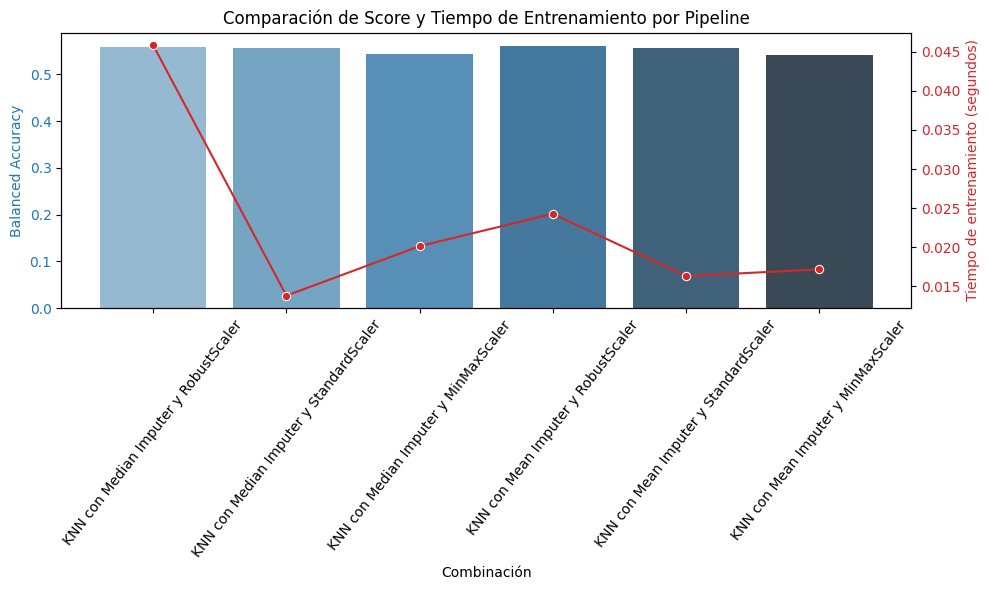

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


# Alternativa 1, KNN, RobustScaler y Median Imputer
pipeline_K_R_A = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_R_A = cross_validate(pipeline_K_R_A, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Median Imputer y RobustScaler"] = {"score": scores_K_R_A["test_score"].mean(),
                                                    "pipeline": pipeline_K_R_A,
                                                    "fit_time": scores_K_R_A["fit_time"].mean()}

# Alternativa 2, KNN, StandardScaler y Median Imputer
pipeline_K_S_A = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_S_A = cross_validate(pipeline_K_S_A, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Median Imputer y StandardScaler"] = {"score": scores_K_S_A["test_score"].mean(),
                                                      "pipeline": pipeline_K_S_A,
                                                      "fit_time": scores_K_S_A["fit_time"].mean()}

# Alternativa 3, KNN, MinMaxScaler y Median Imputer
pipeline_K_M_A = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_M_A = cross_validate(pipeline_K_M_A, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Median Imputer y MinMaxScaler"] = {"score": scores_K_M_A["test_score"].mean(),
                                                    "pipeline": pipeline_K_M_A,
                                                    "fit_time": scores_K_M_A["fit_time"].mean()}

# Alternativa 4, KNN, RobustScaler y Mean Imputer
pipeline_K_R_B = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", RobustScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_R_B = cross_validate(pipeline_K_R_B, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Mean Imputer y RobustScaler"] = {"score": scores_K_R_B["test_score"].mean(),
                                                  "pipeline": pipeline_K_R_B,
                                                  "fit_time": scores_K_R_B["fit_time"].mean()}

# Alternativa 5, KNN, Standard Scaler y Mean Imputer
pipeline_K_S_B = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_S_B = cross_validate(pipeline_K_S_B, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Mean Imputer y StandardScaler"] ={"score": scores_K_S_B["test_score"].mean(),
                                                   "pipeline": pipeline_K_S_B,
                                                   "fit_time": scores_K_S_B["fit_time"].mean()}

# Alternativa 6, KNN, MinMax Scaler y Mean Imputer
pipeline_K_M_B = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_M_B = cross_validate(pipeline_K_M_B, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Mean Imputer y MinMaxScaler"] = {"score": scores_K_M_B["test_score"].mean(),
                                                  "pipeline": pipeline_K_M_B,
                                                  "fit_time": scores_K_M_B["fit_time"].mean()}

best_pipeline = None
best_comb = 0
pipelines = []
scores = []
fit_times = []
for name, data in interna.items():
    selec_score = (data["score"] - data["fit_time"]) * 10
    print(f"{name}: {data['score']} en {data['fit_time']} segundos -- Puntuación en criterio de selección: {selec_score }")
    pipelines.append(name)
    scores.append(data["score"])
    fit_times.append(data["fit_time"])
    if selec_score  > best_comb:
        best_comb = selec_score
        best_pipeline = data["pipeline"]
        best_name = name

print(f"Mejor pipeline: {best_name}")

# Visualizar los tiempos de entrenamiento y los scores
fig, ax1 = plt.subplots(figsize=(10, 6)) #ax1 es un eje

color = 'tab:blue'
ax1.set_xlabel("Combinación")
ax1.set_ylabel("Balanced Accuracy", color=color)
sns.barplot(x=pipelines, y=scores, ax=ax1, palette="Blues_d")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=52)

ax2 = ax1.twinx() #Para dibujar dos figuras en el mismo eje
color = 'tab:red'
ax2.set_ylabel("Tiempo de entrenamiento (segundos)", color=color)
sns.lineplot(x=pipelines, y=fit_times, ax=ax2, sort=False, marker="o", color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparación de Score y Tiempo de Entrenamiento por Pipeline")
plt.tight_layout()
plt.show()


#### Modificación de Hiper-parámetros
Fue seleccionada la combinación de métodos de normalización y imputación que mejor resultados daban. Ahora es pertinente seleccionar los hiper-parámetros que van a utilizarse durante el entrenamiento.

Para el método KNN se modificarán la cantidad de vecinos, los métodos de ponderación (uniform y distance) y el métodod de cálculo de distancia (euclida, manhattan o chebysev). Al haber más de un hiper-parámetro y muchas combinaciones prosibles se va a utilizar el procedimiento de busqueda en rejilla (grid-search) para encontrar la mejor. Para gráficar los resultados se utilizó el mismo tipo de gráfica que en el punto anterior.

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Training time is equal to:8.150561094284058 seconds
Mejores hiperparámetros para KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}


<ipython-input-70-b2c2f3631634>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


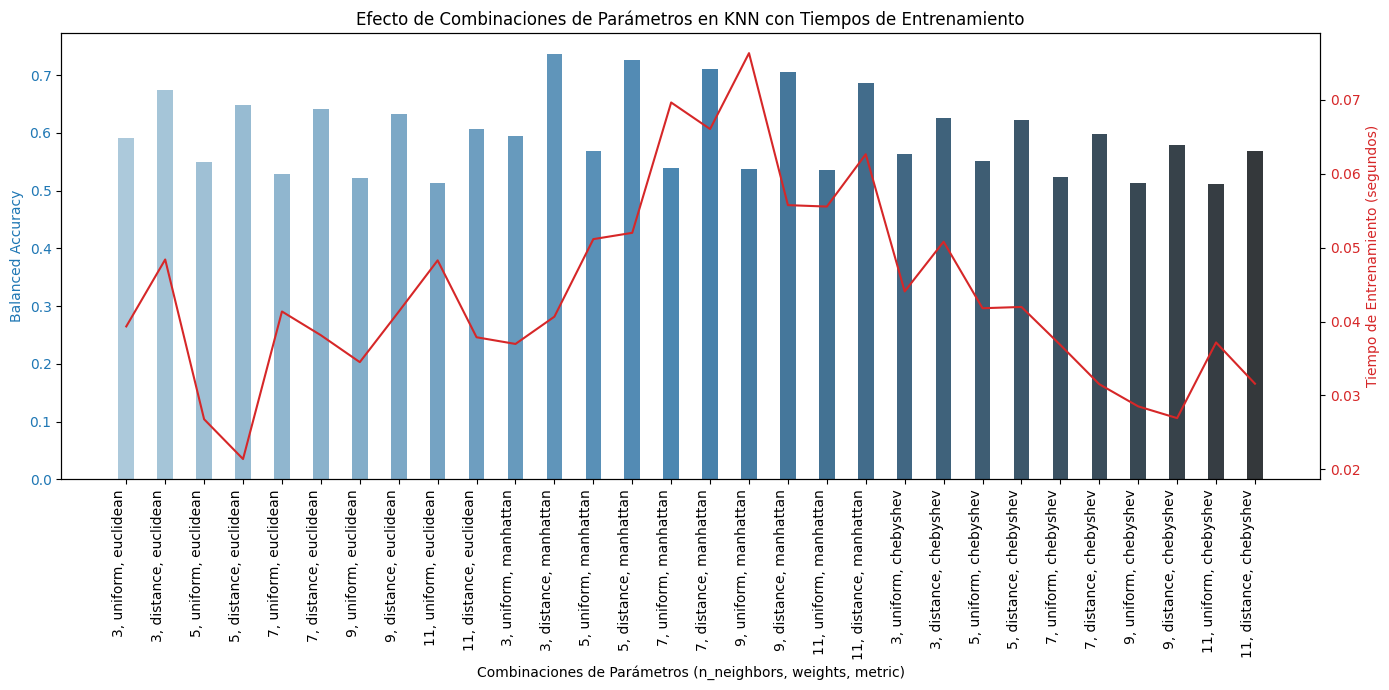

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Definir los parámetros que quieres optimizar
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11],  # Número de vecinos para KNN
    "knn__weights": ['uniform', 'distance'],  # Método de ponderación
    "knn__metric": ['euclidean', 'manhattan', 'chebyshev'],  # Distancia
}

grid_search_KNN = GridSearchCV(best_pipeline, param_grid, cv=3, n_jobs=-1, scoring="balanced_accuracy", verbose=3)

grid_search_KNN.fit(x_train, y_train)

print(f"Mejores hiperparámetros para KNN: {grid_search_KNN.best_params_}")

best_model_knn = grid_search_KNN.best_estimator_

results_knn = pd.DataFrame(grid_search_KNN.cv_results_)

results_knn['param_combination'] = (
    results_knn['param_knn__n_neighbors'].astype(str) + ', ' +
    results_knn['param_knn__weights'] + ', ' +
    results_knn['param_knn__metric']
)

# Ajustar los datos para que 'n_neighbors' sea numérico
results_knn["param_knn__n_neighbors"] = pd.to_numeric(results_knn["param_knn__n_neighbors"], errors="coerce")

plt.figure(figsize=(14, 7))

#Organizar gráfico del "balanced accuracy"
ax1 = plt.gca()  # Obtener el eje actual
sns.barplot(
    x='param_combination',
    y='mean_test_score',
    data=results_knn,
    ax=ax1,
    palette="Blues_d",
    width=0.4
)


ax1.set_title("Efecto de Combinaciones de Parámetros en KNN con Tiempos de Entrenamiento")
ax1.set_xlabel("Combinaciones de Parámetros (n_neighbors, weights, metric)")
ax1.set_ylabel("Balanced Accuracy", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=90, ha='right')

#Organizar gráfico del tiempo de ejecucción
ax2 = ax1.twinx()
sns.lineplot(
    data=results_knn,
    x='param_combination',
    y='mean_fit_time',
    markers=True,
    color='tab:red',
    ax=ax2
)

ax2.set_ylabel("Tiempo de Entrenamiento (segundos)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ajustar el gráfico para evitar la superposición de leyendas y etiquetas
plt.tight_layout()


plt.show()


Fitting 3 folds for each of 45 candidates, totalling 135 fits
Mejores hiperparámetros para Árbol: {'tree__max_depth': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}


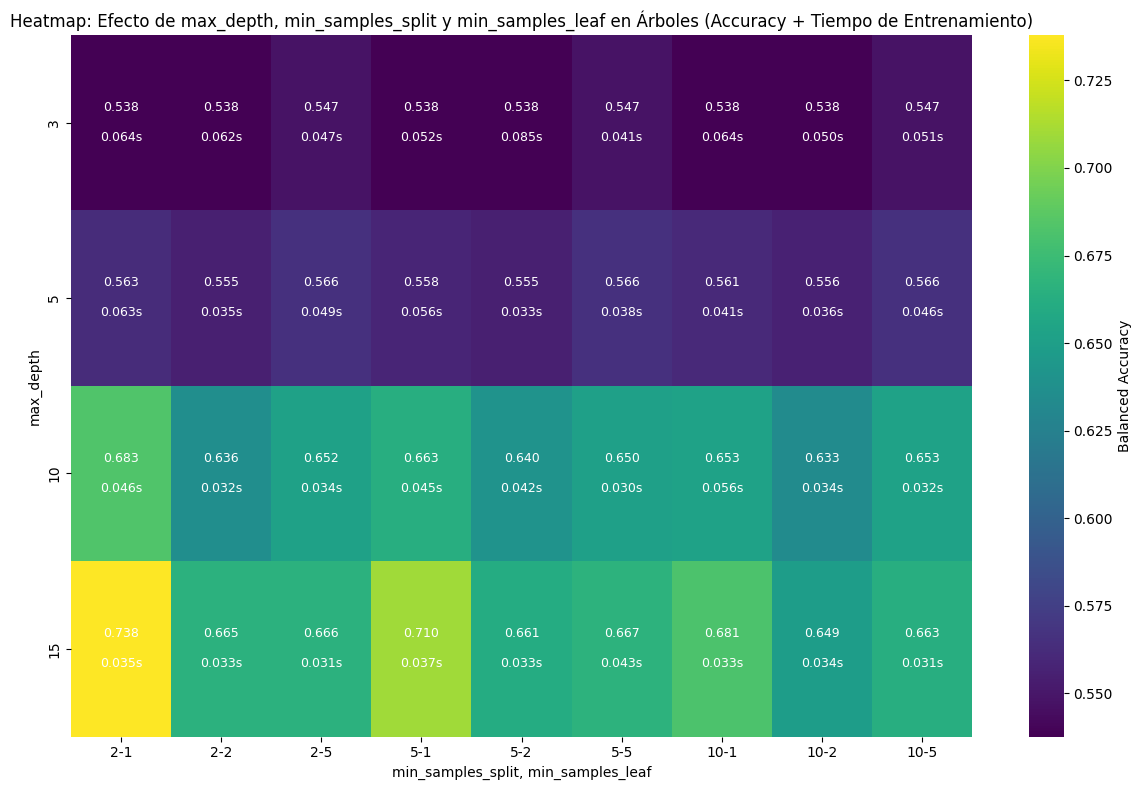

In [ ]:
#Ajuste de Hiperparametros para árboles

best_imputer = best_pipeline.named_steps["imputer"]
best_scaler = best_pipeline.named_steps["scaler"]

best_pipeline_tree = Pipeline([
    ("imputer", best_imputer),
    ("scaler", best_scaler),
    ("tree", DecisionTreeClassifier())
])

param_grid_tree = {
    "tree__max_depth": [3, 5, 10, 15, None],  # Profundidad máxima
    "tree__min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir
    "tree__min_samples_leaf": [1, 2, 5]  # Mínimo de muestras en una hoja
}

grid_search_tree = GridSearchCV(best_pipeline_tree, param_grid_tree, cv=3, n_jobs=-1, scoring="balanced_accuracy", verbose=3)

grid_search_tree.fit(x_train, y_train)

print(f"Mejores hiperparámetros para Árbol: {grid_search_tree.best_params_}")

best_model_tree = grid_search_tree.best_estimator_

# Convertir los resultados del grid search para árboles a un DataFrame
results_tree = pd.DataFrame(grid_search_tree.cv_results_)

# Create pivot tables for accuracy and training time
pivot_accuracy = results_tree.pivot_table(
    index='param_tree__max_depth',
    columns=['param_tree__min_samples_split', 'param_tree__min_samples_leaf'],
    values='mean_test_score'
)

pivot_time = results_tree.pivot_table(
    index='param_tree__max_depth',
    columns=['param_tree__min_samples_split', 'param_tree__min_samples_leaf'],
    values='mean_fit_time'
)

# Plot the accuracy heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_accuracy, annot=False, fmt='.3f', cmap="viridis", cbar_kws={'label': 'Balanced Accuracy'})

# Add training time annotations
for i in range(pivot_accuracy.shape[0]):
    for j in range(pivot_accuracy.shape[1]):
        accuracy = pivot_accuracy.iloc[i, j]
        time = pivot_time.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f"{accuracy:.3f}\n\n{time:.3f}s", ha='center', va='center', color='white', fontsize=9)

# Titles and labels
plt.title("Heatmap: Efecto de max_depth, min_samples_split y min_samples_leaf en Árboles (Accuracy + Tiempo de Entrenamiento)")
plt.xlabel("min_samples_split, min_samples_leaf")
plt.ylabel("max_depth")
plt.tight_layout()

# Show the plot
plt.show()

### Evaluación Externa
De la evaluación interna realizada se puede concluir que hubo una combinación que fue un poco más acertada que las demás. Esta combinación es una normalización con RobustScaler y una imputación con la mediana. Ahora se realiza la estimación del desempeño con respecto a la variable. Las ,étricas que vamos a utilizar para analizar el desempeño son: balanced accuracy, TPR (accuracy de la clase positiva), TNR (accuracy de la clase negativa) y accuracy. Para facilitar el entendimiento de las métricas utilizaremos una matrix de confusión.

Mejor modelo de KNN: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])
Mejor modelo KNN: 
  Accuracy: 0.936734693877551
  Balanced Accuracy: 0.8702608642089378
  TPR (Sensitivity): 0.7721518987341772
  TNR (Specificity): 0.9683698296836983
Mejor modelo de Árboles: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier())])

Mejor modelo Árboles: 
  Accuracy: 0.9061224489795918
  Balanced Accuracy: 0.8545689734823987
  TPR (Sensitivity): 0.7784810126582279
  TNR (Specificity): 0.9306569343065694


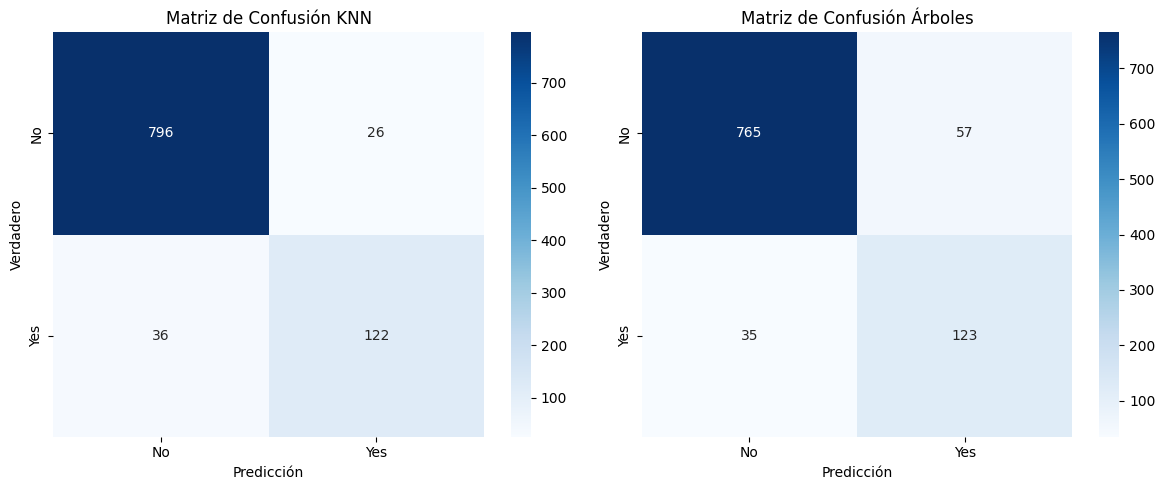

In [ ]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

best_model_knn.fit(x_train, y_train)
y_pred_knn = best_model_knn.predict(x_test)

best_model_tree.fit(x_train, y_train)
y_pred_tree = best_model_tree.predict(x_test)

# Calcular la matriz de confusión para KNN y Árboles
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_tree = confusion_matrix(y_test, y_pred_tree)

TP_KNN = cm_knn[1, 1]  # Verdaderos positivos
TN_KNN = cm_knn[0, 0]  # Verdaderos negativos
FP_KNN = cm_knn[0, 1]  # Falsos positivos
FN_KNN = cm_knn[1, 0]  # Falsos negativos

# Calcular las métricas de KNN
accuracy_KNN = accuracy_score(y_test, y_pred_knn)
balanced_accuracy_KNN = balanced_accuracy_score(y_test, y_pred_knn)
TPR_KNN = TP_KNN / (TP_KNN + FN_KNN)  # Sensitividad (Proporción positivas clasificadas correctamente)
TNR_KNN = TN_KNN / (TN_KNN + FP_KNN)  # Especificidad (Proporción clasificadas postivas que si los son)

# Calcular la matriz de confusión para Árboles
cm_tree = confusion_matrix(y_test, y_pred_tree)
TP_tree = cm_tree[1, 1]  # Verdaderos positivos
TN_tree = cm_tree[0, 0]  # Verdaderos negativos
FP_tree = cm_tree[0, 1]  # Falsos positivos
FN_tree = cm_tree[1, 0]  # Falsos negativos

# Calcular las métricas de Árboles
accuracy_tree = accuracy_score(y_test, y_pred_tree)
balanced_accuracy_tree = balanced_accuracy_score(y_test, y_pred_tree)
TPR_tree = TP_tree / (TP_tree + FN_tree)  # Sensitividad (Proporción positivas clasificadas correctamente)
TNR_tree = TN_tree / (TN_tree + FP_tree)  # Especificidad (Proporción clasificadas postivas que si los son)

# Guardar los resultados
metricas_KNN= {}
metricas_tree= {}

# Imprimir el nombre del mejor modelo y sus hiperparámetros de KNN
print(f"Mejor modelo de KNN: {grid_search_KNN.best_estimator_}")

metricas_KNN["Mejor modelo KNN: "] = {
    "Accuracy": accuracy_KNN,
    "Balanced Accuracy": balanced_accuracy_KNN,
    "TPR (Sensitivity)": TPR_KNN,
    "TNR (Specificity)": TNR_KNN
}
# Mostrar los resultados
for name, metrics in metricas_KNN.items():
    print(f"{name}")
    if isinstance(metrics, dict):  # Verificamos si el valor es un diccionario
        for metric, value in metrics.items():
            print(f"  {metric}: {value}")
    else:  # Si es un valor numérico
        print(f"  Score: {metrics}")


# Imprimir el nombre del mejor modelo y sus hiperparámetros de Árboles
print(f"Mejor modelo de Árboles: {grid_search_tree.best_estimator_}")

metricas_tree["\nMejor modelo Árboles: "] = {
    "Accuracy": accuracy_tree,
    "Balanced Accuracy": balanced_accuracy_tree,
    "TPR (Sensitivity)": TPR_tree,
    "TNR (Specificity)": TNR_tree
}


# Mostrar los resultados
for name, metrics in metricas_tree.items():
    print(f"{name}")
    if isinstance(metrics, dict):  # Verificamos si el valor es un diccionario
        for metric, value in metrics.items():
            print(f"  {metric}: {value}")
    else:  # Si es un valor numérico
        print(f"  Score: {metrics}")

plt.figure(figsize=(12, 5))
# Dibujar la matriz de confusión de KNN
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Matriz de Confusión KNN")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")

# Dibujar la matriz de confusión de Árboles
plt.subplot(1, 2, 2)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Matriz de Confusión Árboles")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")

plt.tight_layout()
plt.show()
